# Package Import

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import matplotlib.pyplot as plt

print("Import Successful")

Import Successful


# Data Pre-Processing

In [13]:
images_dir = "/kaggle/input/coffee-fruit-maturity/Coffee Fruit Maturity ---.v1i.yolov8/train/images"
labels_dir = "/kaggle/input/coffee-fruit-maturity/Coffee Fruit Maturity ---.v1i.yolov8/train/labels"
image_files = os.listdir(os.path.join(train_dir, 'images'))

Class index: 2
Centroid: (x=0.39185366997282606, y=0.12092099110054351)
Class index: 2
Centroid: (x=0.29104721827445645, y=0.23315801766304348)
Class index: 2
Centroid: (x=0.27017297798913054, y=0.3708158019021739)
Class index: 2
Centroid: (x=0.5327783558971773, y=0.665461324798387)
Class index: 2
Centroid: (x=0.4077864292564655, y=0.7609844272090515)
Class index: 1
Centroid: (x=0.23276344081250003, y=0.7469892473124999)
Class index: 1
Centroid: (x=0.5276401689732143, y=0.2108774961495536)
Class index: 1
Centroid: (x=0.4025020678485577, y=0.34811827956730773)
Class index: 0
Centroid: (x=0.1156013540509259, y=0.6785344484953704)
Class index: 0
Centroid: (x=0.6318181816761362, y=0.07548875859375001)
Class index: 0
Centroid: (x=0.5268700326766305, y=0.36446937805706525)
Class index: 0
Centroid: (x=0.49669738861607143, y=0.04316436261160715)
Class index: 0
Centroid: (x=0.34938172054687505, y=0.8834677420312499)
Class index: 0
Centroid: (x=0.48857526875, y=0.42946908593750005)
Class index: 

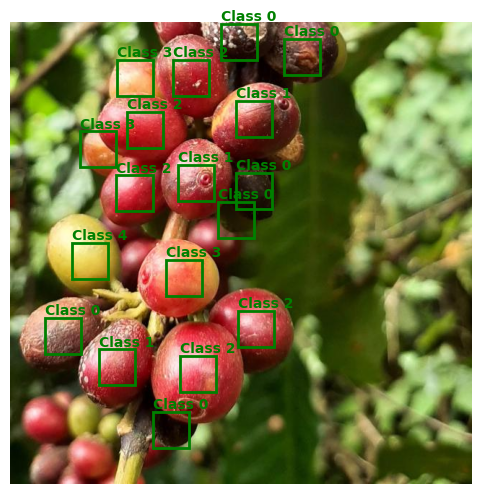

In [30]:
first_image_file = image_files[0]

# Read corresponding label file
label_file = os.path.splitext(first_image_file)[0] + '.txt'
label_path = os.path.join(labels_dir, label_file)

with open(label_path, 'r') as f:
    lines = f.readlines()

# Read image
image_path = os.path.join(train_dir, 'images', first_image_file)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

all_cherries_centroids = []

with open(label_path, 'r') as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split()
    if len(parts) < 5:
        continue  # Skip lines with insufficient data

    class_index = int(parts[0])  # Ripeness class index (0 to 5)
    coordinates = []
    
    for i in range(1, len(parts), 2):
        x = float(parts[i])
        y = float(parts[i + 1])
        coordinates.append((x, y))
    
    # Calculate centroid (average) of coordinates
    num_points = len(coordinates)
    if num_points > 0:
        sum_x = sum(coord[0] for coord in coordinates)
        sum_y = sum(coord[1] for coord in coordinates)
        centroid_x = sum_x / num_points
        centroid_y = sum_y / num_points
    else:
        centroid_x = 0.0
        centroid_y = 0.0
    
    all_cherries_centroids.append({
        'class_index': class_index,
        'centroid_x': centroid_x,
        'centroid_y': centroid_y
    })

# Example usage: Print the extracted centroids
for cherry in all_cherries_centroids:
    print(f"Class index: {cherry['class_index']}")
    print(f"Centroid: (x={cherry['centroid_x']}, y={cherry['centroid_y']})")

# Overlay bounding boxes on image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')

for cherry in all_cherries_centroids:
    class_index = cherry['class_index']
    centroid_x = cherry['centroid_x'] * image.shape[1]
    centroid_y = cherry['centroid_y'] * image.shape[0]

    # Define bounding box parameters (adjust as needed)
    box_width = 50
    box_height = 50
    xmin = int(centroid_x - box_width / 2)
    ymin = int(centroid_y - box_height / 2)
    xmax = int(centroid_x + box_width / 2)
    ymax = int(centroid_y + box_height / 2)

    # Draw rectangle
    rect = plt.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='g', facecolor='none')
    plt.gca().add_patch(rect)

    # Annotate class index
    plt.text(xmin, ymin - 5, f'Class {class_index}', color='green', fontsize=10, weight='bold')

plt.show()